이 노트북의 코드에 대한 설명은 [MLPClassifier의 다중 레이블 분류](https://tensorflow.blog/2018/02/18/mlpclassifier%EC%9D%98-%EB%8B%A4%EC%A4%91-%EB%A0%88%EC%9D%B4%EB%B8%94-%EB%B6%84%EB%A5%98/) 글을 참고하세요.

In [1]:
from preamble import *

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
y_train.shape, y_train

((75,),
 array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0]))

이진 데이터셋을 멀티 클래스로 변경

In [3]:
Y_train = np.zeros((y_train.shape[0], 2))
for index, x in np.ndenumerate(y_train):
    Y_train[index, x] = 1

Y_test = np.zeros((y_test.shape[0], 2))
for index, x in np.ndenumerate(y_test):
    Y_test[index, x] = 1

Y_train[:10], Y_test[:10]

(array([[0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.]]),
 array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

MLPClassifier는 출력값의 두번째 차원을 보고 멀티 클래스 문제인지 자동으로 인식합니다.

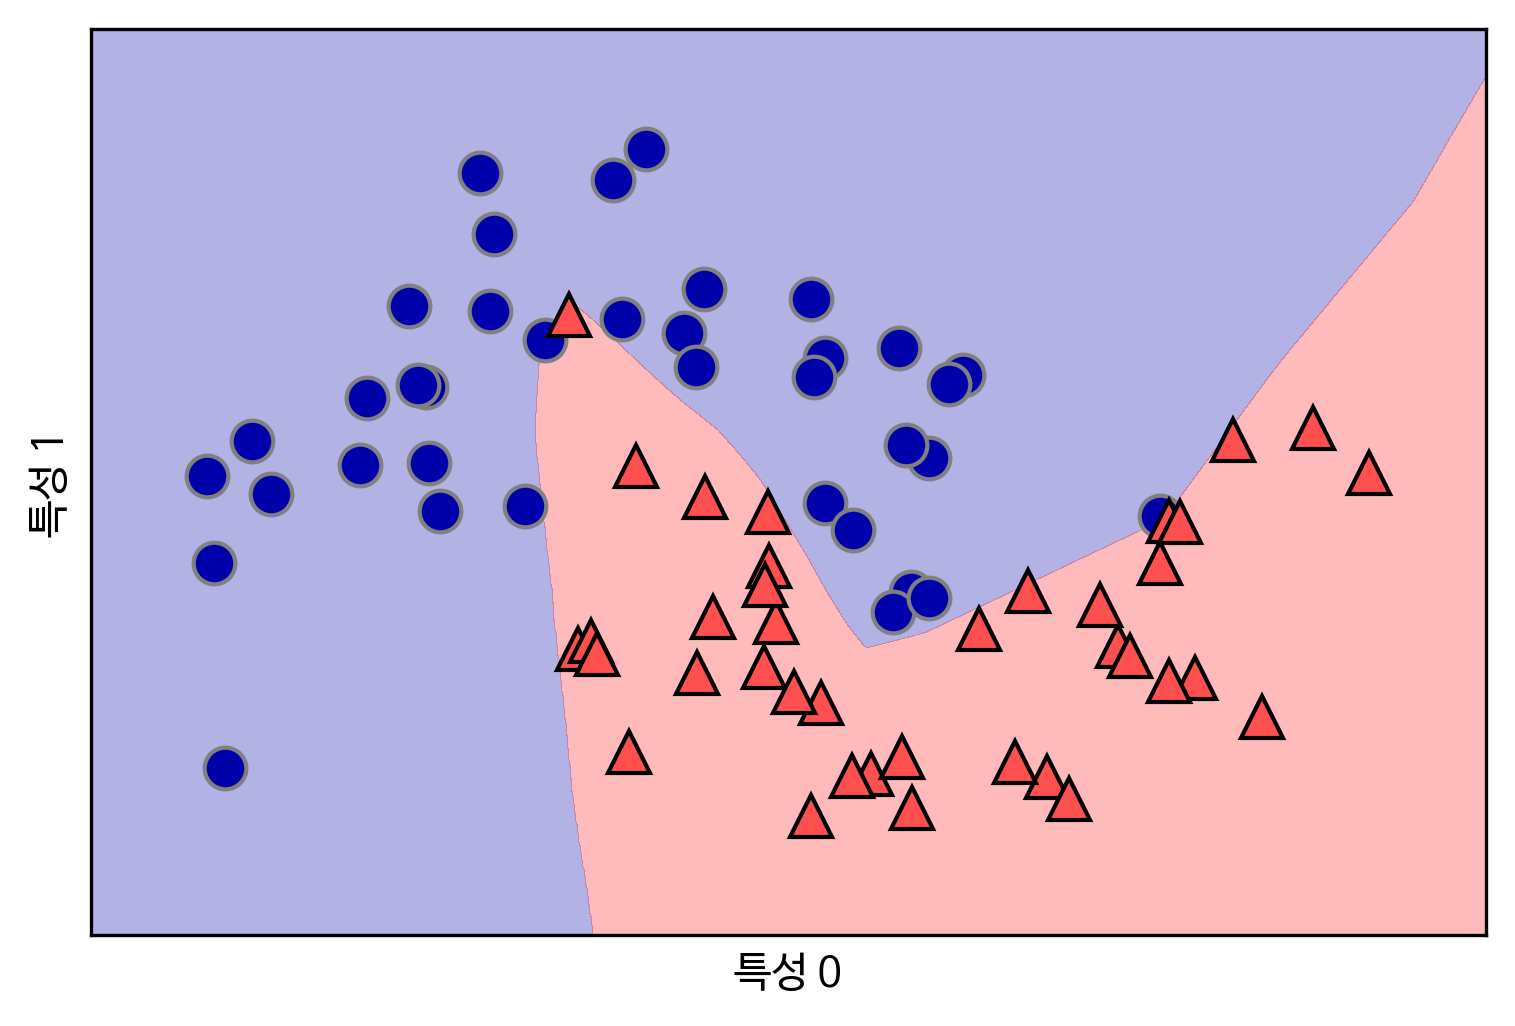

In [4]:
mlp_multi = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, Y_train)
mglearn.plots.plot_2d_separator(mlp_multi, X_train, fill=True, alpha=.3)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

책의 예제처럼 이진 분류일 경우

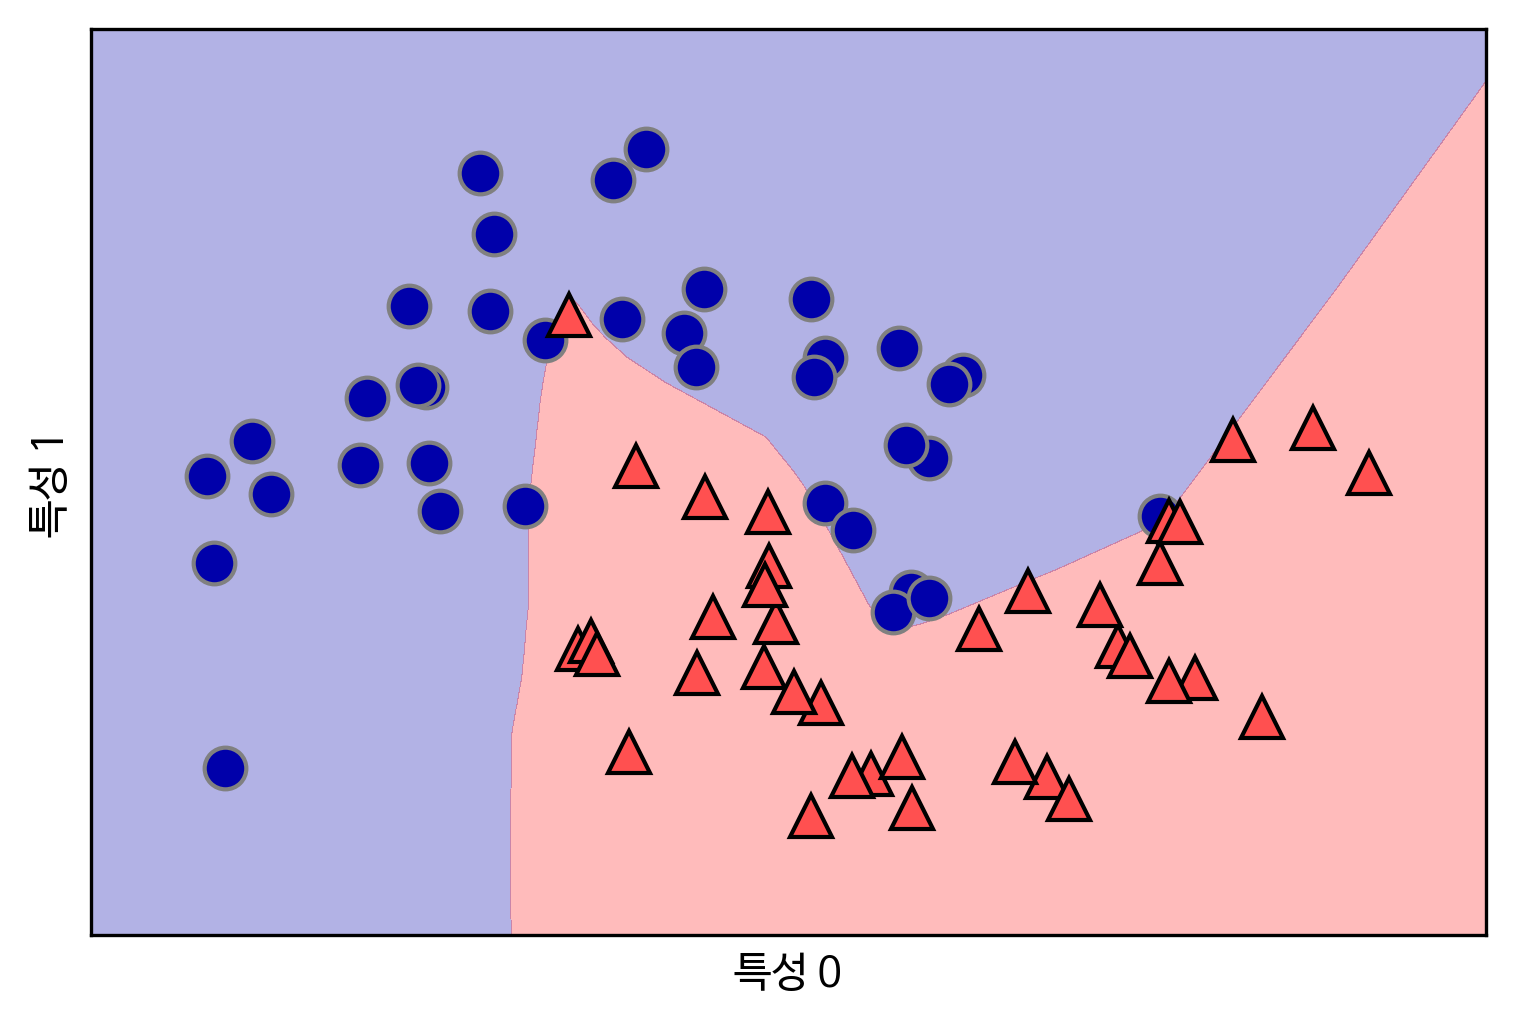

In [5]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

In [6]:
mlp_multi.score(X_test, Y_test), mlp.score(X_test, y_test)

(0.88, 0.88)

Yeast 데이터셋으로 다중 분류 테스트

In [7]:
from sklearn.datasets import fetch_openml
yeast = fetch_openml('yeast', version=4)

In [8]:
X = yeast['data']
Y = yeast['target']
Y = Y == 'TRUE'
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X.shape, Y_train[:10]

((2417, 103),
       Class1  Class2  Class3  Class4  ...  Class11  Class12  Class13  Class14
 1681   False    True    True    True  ...     True     True     True    False
 1565    True    True   False   False  ...    False     True     True    False
 544    False    True    True    True  ...    False    False    False    False
 1517   False   False   False   False  ...    False     True     True    False
 821     True    True   False   False  ...    False     True     True    False
 1691   False   False   False   False  ...    False    False    False    False
 2232   False   False   False    True  ...    False     True     True    False
 998    False   False   False   False  ...     True     True     True    False
 602    False   False   False   False  ...    False     True     True    False
 575    False   False   False   False  ...    False     True     True    False
 
 [10 rows x 14 columns])

정확도는 각 행의 모든 클래스가 정확히 맞아야 됩니다.

In [9]:
mlp_multilabel = MLPClassifier(hidden_layer_sizes=(300,100), max_iter=10000, random_state=42).fit(X_train, Y_train)
mlp_multilabel.score(X_test, Y_test)

0.12396694214876033

In [10]:
Y_pred = mlp_multilabel.predict(X_test)
Y_pred[:10]

array([[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]])

각 행에서 하나의 클래스라도 맞은 경우를 헤아려 봅니다.

In [11]:
np.sum(np.sum(Y_test.astype(int) & Y_pred, axis=1) > 0)/Y_test.shape[0]

0.890495867768595